In [1]:
from electra_package.release_2 import *
from electra_package.modules_utils import look_for_vano

file = "VDI711.json"
path = "./data/lineas_completas/" 

with open(path+file, 'r') as archivo:
        data = json.load(archivo)
        
file

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


SyntaxError: invalid syntax. Perhaps you forgot a comma? (modules_main2.py, line 540)

Setting logger
Extracting vano info...

Reference C_13434462_13434463
Expected conductors from data: 3
Number of empty lines from data: 0
Downsampling LIDAR to 25%
Backings cloud shape: (3, 933), Conductor cloud shape: (3, 3338)
Analyzing backings
Max variance coordinate for backings 1
Redefining backings
Starting KMeans clustering for coord: 1
Initzialization [4301113.2115 4301263.8182]
Convergence reached at iteration 0
Rotating vano
Cropping conductor with backings
Umbral de corte superior detectado: 4053109.1715815375
Umbral de corte superior detectado: 4053161.1455179392
Scaling conductor
Analyzing conductor configuration 2
Conductor variances 0.4704342793791214 ,0.02647618201734774, 0.1976613218108092
Histogram and variance conditions (x,z) (True, True), (True, False)
Max var coordinate for conductors 0
Distribución horizontal
Analyzing conductor configuration 1
[0, 0, 0, 0, 0, 3, 3, 3, 0, 0], []
Number of lines from mode: 3
[True, True, True, True, True, False, False, False, Tru

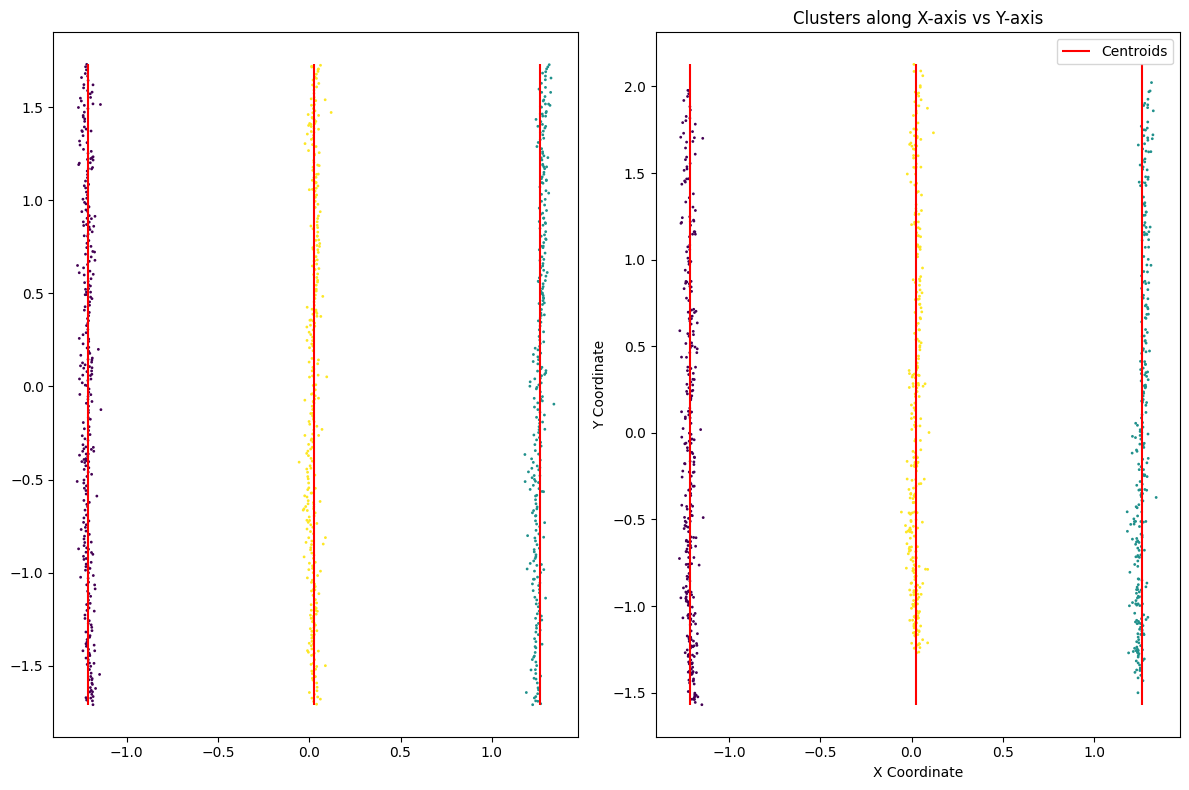

Conductor number confirmation for 3 lines
Good clustering with n conductors: 3
Fitting and evaluating
Fitting with catenaria function
Interquartile filtering prefit
Evaluating fits
Saving results


/home/ubuntu-deduce/Projects/electra-ia/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Time 1, time 2: 0.7895207405090332, 102.1050283908844


In [ ]:
set_logger("DEBUG")

i, vano = look_for_vano(data, "C_13434462_13434463")

response_vano, metrics = process_vano(vano)

In [10]:
response_vano["COMPLETITUD"]

'partially incomplete7'

In [3]:
plot_data("", cond_values, list(apoyo_values), vert_values, extremos_values)

NameError: name 'cond_values' is not defined

In [41]:
from electra_package.modules_clustering import *

idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(vano)

def analyze_polilinia_values(vert_values, vano_length):

    expected_conductor_number = len(vert_values)

    empty_poli = 0

    for poli in vert_values:
        
        if len(poli) == 0:
            empty_poli += 1
            continue
        
        else:
            
            max = poli[:,np.where(poli[1] == np.max(poli[1]))].flatten()
            min = poli[:,np.where(poli[1] == np.min(poli[1]))].flatten()
            
            logger.trace(f"Empy polilinia %: {abs(np.linalg.norm(max-min)-vano_length)/vano_length}")
            
            if abs(np.linalg.norm(max-min)-vano_length)/vano_length > 10.0:        
                empty_poli += 1
            
    return empty_poli, expected_conductor_number

Extracting vano info...
Empy polilinia %: 0.5147654665403824
Empy polilinia %: 0.5152831505540169
Empy polilinia %: 0.5130908475661011
Empy polilinia %: 0.4989548205279031
Empy polilinia %: 0.4992699272387793
Empy polilinia %: 0.5003662690517333


(0, 6)

In [6]:
vano["CONDUCTORES"][0]

{'OBJECTID_VANO_3D': 445,
 'LONGITUD_2D': 118.80707232286899,
 'LONGITUD_3D': 118.91190848119386,
 'VERTICES': [[114787.9598000003, 4669012.0627, 658.4315999999963],
  [114785.10840000026, 4669020.055600001, 658.1447999999946],
  [114782.25719999988, 4669028.0485, 657.9321000000054],
  [114779.40610000025, 4669036.0414, 657.7934999999998],
  [114776.5552000003, 4669044.034399999, 657.7290000000066],
  [114773.70440000016, 4669052.0275, 657.7385000000068],
  [114770.85369999986, 4669060.0206, 657.8221000000049],
  [114768.00320000015, 4669068.013699999, 657.979800000001],
  [114765.1529000001, 4669076.006899999, 658.2115000000049],
  [114762.30269999988, 4669084.0002, 658.517399999997],
  [114759.45260000043, 4669091.9935, 658.8974000000017],
  [114756.6026999997, 4669099.9869, 659.3515000000043],
  [114753.75299999956, 4669107.9803, 659.8798999999999],
  [114750.90340000018, 4669115.9738, 660.4824999999983],
  [114748.05389999971, 4669123.9673, 661.1592999999993]]}

In [39]:
dbscan_find_clusters_3(cond_values)

([[114791.55707290856, 4669001.774207352, 655.636038337061],
  [114746.90874782605, 4669127.387826087, 661.1863739130436]],
 array([0, 0, 0, ..., 0, 0, 0]))

In [43]:
from electra_package.modules_clustering import *

idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(vano)

def extract_n_clusters(points):

    X_scaled,scaler_x,scaler_y,scaler_z = scale_conductor(points)

    cent, labs = dbscan_find_clusters_3(X_scaled)

    real_clust = 0
    noise = False
    total_points = X_scaled.shape[1]

    points_per_clust = total_points/(len(labs)-1)

    noise_cluster = 0
    real_labels = []
    clusters = []
    
    print(labs)

    for lab in np.unique(labs):
        
        print(100*abs(np.sum(lab == labs))/total_points)
        if 100*abs(np.sum(lab == labs))/total_points > 10:
            
            if lab == -1:
                
                noise = True
                noise_cluster = X_scaled[:,lab == labs]
                
            else:
                real_labels.append(lab)
                real_clust += 1
                clusters.append(X_scaled[:,lab == labs])
                

                
    return clusters, noise_cluster

clusters, noise = extract_n_clusters(apoyo_values)

print(apoyo_values.shape, cond_values.shape)

print(len(clusters), noise)

# clusters, noise = extract_n_clusters(cond_values)

# print(len(clusters), noise)

plot_data("", cond_values, apoyo_values, vert_values, extremos_values)
plt.show()

Extracting vano info...
Scaling conductor
[0 0 0 ... 3 3 3]
1.4556962025316456
49.68354430379747
18.481012658227847
1.0443037974683544
1.7088607594936709
27.626582278481013
(3, 3160) (3, 9849)
3 0
